# Vertebral Column Data Exploration

##### Vertebral Column? Get in my Dataset Column!
##### Group 9: Tommy Xu | Yuru Liu | Trinh Nguyen z

### Introduction

In this report, we propose a classification model that can assist physicians in diagnosing verbebral disorders. The vertebral column is instrumental to our health, activeness, and well-being. Yet, vertebral disorders are not adequately understood by the public and people are suffer from late diagnosis and treatment. There are two main reasons for this. Firstly, diagnosis of vertebral disorders are often dependent on the experience and skill of the physician. Although there is advacned clincial technology nowadays, reliable and data-driven tools are not commonly used for vertebral disorders. Secondly, aging attenuates spinal problems may silently impact an otherwise healthy adult. 

As people age, bone matter starts to degrade and the structural integrities of our skeletons sharply decline. Specifically, this may lead to two different conditions - herniated discs and spondylolisthesis. Herniated discs occur when the pulpy nucleus of the vertebral discs leak out, often causing sharp pain in the lower back. Contrarily, spondylolsisthesis is a form of vertebral 'slipping', where a higher vertebra slips forward and becomes misaligned with the vertebra below, applying uncomfortable pressure on one's spine (1).

Hernias and spondylolisthesis are commonly confused with each other, as one is a 'slipped vertebral disc' and the other is 'slipped vertebra', respectively. Also, their symptoms both include lower back and lower leg pain (1). Therefore, these spinal abnormalities can be hard to diagnose and differentiate, especially since pain perception, tolerance, and communication is very variable between patients. Hence, using more objective measures like the physical shape and curvature of someone’s spine may improve diagnosis.

In our project, we will answer the predictive question “What spinal diagnosis will a new patient receive with information about five lower-vertebrae measurements (pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius)?” by creating a K-Nearest-Neighbours (k-nn) classification model using the vertebral column dataset from the UCI Machine Learning Deposit.

In the following sections, we will elucidate the workflow of our model-building process in fivefour steps. First, we start with a description of our dataset. Secondly, we load in the dataset and conduct data wrangling to create a tidy dataset ready for model-building, mainly through checking for missing data, labeling variables names, and scaling variables. Thirdly, we did some exploratory data analysis to help us understand the data set better (e.g. whether up-sampling is needed, whether we should use all predictors). Fourthly, we build a model using the k-nn classification method. Lastly, we present the results and discuss our findings.

###### The Dataset

This dataset has six predictor variables (summarized in the table below), and one categorical variable - the patient's spinal condition (or lack of). Specifically, there are three categories: Disc Hernia (DH), Spondylolisthesis (SL) and Normal (NO).


$\qquad \qquad  \qquad \qquad  \qquad  \qquad  \qquad \qquad \qquad $ Table 1. Summary of the variables in our data set

| Variable Names | Type | Role in our Model |
| --- | --- | --- |
| pelvic_incidence (PI) |Numerical (continuous)  | Predictor |
| pelvic_tilt (PT) | Numerical (continuous) | Predictor |
| lumbar_lordosis (LL)| Numerical (continuous) | Predictor |
| sacral_slope (SS)| Numerical (continuous) | Predictor |
| pelvic_radius (PR)| Numerical (continuous) | Predictor |
| grade_of_spondylolisthesis (GoS) | Numerical (continuous) | Not Included (reasons explained later) |
| class | Categorical | Outcome |


### Methods & Results



First, we load all our necessary libraries.

In [1]:
library(tidyverse)
library(repr)
library(caret)
library(GGally)
library(gridExtra)
set.seed(1234)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



To begin, we load in our dataset. The data set we chose to use is contained in a .zip file, and the url directs to the .zip file, so we have to use the unz function to get the data set we want.

There were metadata in this dataset, so we skipped the first 12 rows when loading in the dataset. Also, there were no column names in the dataset, so we added our own, taking them from the dataset description. Finally, we changed the 'class' variable to a factor for the purposes of classification.

In [2]:
# reference: Piazza post
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip",temp)
spine <- read_csv(unz(temp, "column_3C_weka.arff"), skip = 12, col_names = c('pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'class'))
unlink(temp)

spine$class <- as.factor(spine$class)

print("Orginal Vertebral Column Dataset")
head(spine)

Parsed with column specification:
cols(
  pelvic_incidence = col_double(),
  pelvic_tilt = col_double(),
  lumbar_lordosis = col_double(),
  sacral_slope = col_double(),
  pelvic_radius = col_double(),
  grade_of_spondylolisthesis = col_double(),
  class = col_character()
)


[1] "Orginal Vertebral Column Dataset"


pelvic_incidence,pelvic_tilt,lumbar_lordosis,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63.02782,22.552586,39.60912,40.47523,98.67292,-0.254400,Hernia
39.05695,10.060991,25.01538,28.99596,114.40543,4.564259,Hernia
68.83202,22.218482,50.09219,46.61354,105.98514,-3.530317,Hernia
69.29701,24.652878,44.31124,44.64413,101.86850,11.211523,Hernia
49.71286,9.652075,28.31741,40.06078,108.16872,7.918501,Hernia
40.25020,13.921907,25.12495,26.32829,130.32787,2.230652,Hernia


We noticed that some of these variables aren't on the same scale, which would directly impair the k-nn classification process since k-nn algotithm uses Euclidean distance. Hence, we scaled the data below:

In [3]:
scaled_spine  <-  spine  %>%
      select(-c(class))  %>%
      scale(center=TRUE)
scaled_spine <- data.frame(scaled_spine, class=spine$class)

print("Scaled Vertebral Column Dataset")
head(scaled_spine)

[1] "Scaled Vertebral Column Dataset"


pelvic_incidence,pelvic_tilt,lumbar_lordosis,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.1468489,0.5005594,-0.66410316,-0.1846518,-1.4453100,-0.7069165,Hernia
-1.2438533,-0.7475603,-1.45065531,-1.0398395,-0.2639581,-0.5786208,Hernia
0.4835876,0.4671768,-0.09910152,0.2726425,-0.8962365,-0.7941370,Hernia
0.5105645,0.7104138,-0.41067507,0.1259246,-1.2053545,-0.4016390,Hernia
-0.6256363,-0.7884179,-1.27268741,-0.2155274,-0.7322711,-0.4893150,Hernia
-1.1746253,-0.3617902,-1.44474979,-1.2385764,0.9316562,-0.6407526,Hernia


Before we split up our data into training and testing sets, we just needed to check there aren't any missing values in our dataset:

In [4]:
count_row_with_NA <- sum(!complete.cases(scaled_spine))
print(paste0("Number of missing values in the whole dataset: ",
             count_row_with_NA, sep=''))

[1] "Number of missing values in the whole dataset: 0"


Now, we can split up our training and testing datasets. We decided to split the data at 75%-training and 25%-testing.

In [5]:
training_rows <- scaled_spine %>%
  select(class) %>%
  unlist() %>%
  createDataPartition(p = 0.75, list = FALSE)

training_set <- scaled_spine %>% slice(training_rows)
testing_set <- scaled_spine %>% slice(-training_rows)

X_training  <- training_set  %>%
  select(-c(grade_of_spondylolisthesis,class))  %>%
  data.frame()

Y_training   <- training_set  %>%
  select(class)  %>%
  unlist()

X_test <- testing_set %>%
   select(-c(grade_of_spondylolisthesis,class))  %>%
   data.frame()

Y_test <- testing_set %>%
   select(class) %>%
   unlist()

##### Exploratory Data Analysis

There are mainly three steps in our exploratory data analysis. We checked the number of observations in each class and the distribution of the three classes. Then, we found out the mean of each variable for each class. Lastly, we created a ggpair plot. The detailed description and reasons for doing these are explained step by step later.

Firstly, we check the number of data points in each class to see whether the three classes are balanced.(Shown in **Table 2**). If the three classes were significantly unbalanced, then we might need to up-sample or down-sample.

In [6]:
n_obs <- nrow(training_set)

print("Table 2. Summary of each class")
training_summarized <- training_set %>%
                    group_by(class) %>%
                    summarize( n = n(), "percentage of this class"= n()/ n_obs*100)
training_summarized

[1] "Table 2. Summary of each class"


class,n,percentage of this class
<fct>,<int>,<dbl>
Hernia,45,19.31330
Normal,75,32.18884
Spondylolisthesis,113,48.49785


From **Table 2**, we can see that the dataset is slightly unbalanced, with spondylolisthesis-labeled data points representing nearly 50% of the population. We could upsample the data to balance the classes out, but we needed more information before deciding to do so. Our consideration was that if the three class's data points are thoroughly 'mixed together', then up-sampling would not have been particularly beneficial, since upsampling methods model the original dataset very closely. To see if the classes were 'mixed' enough, we needed to plot the variables out. However, plotting 6-variables in a succinct manner was very difficult, so we decided to create a few 2-variable scatter-plots to visualize it instead. Below, we chose 2 variables from the 6 variables for each plot, aiming to represent each of the 6 variables once.

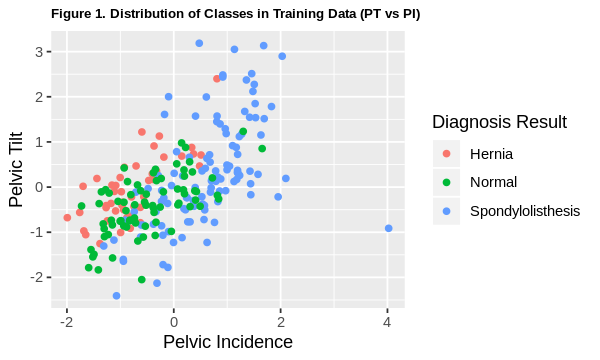

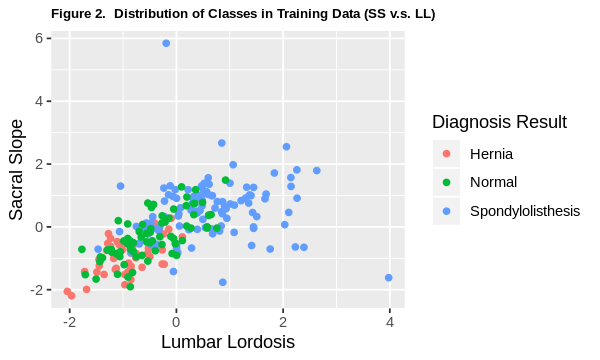

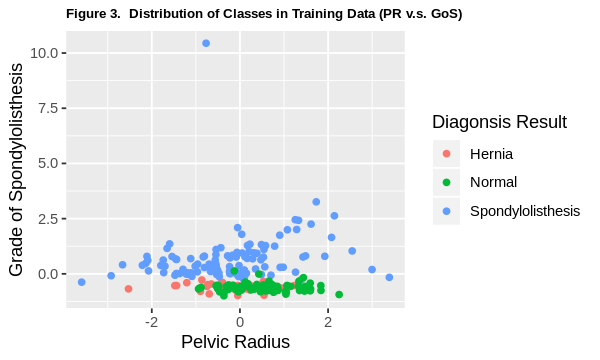

In [7]:
#Set our plot sizes to fit our view
options(repr.plot.height=3, repr.plot.width=5)

#visualize class distributino using PI and PT as axes
class_distribution_1  <- training_set %>%
    ggplot(aes(x = pelvic_incidence,
               y = pelvic_tilt,
               colour = class)) +
        geom_point() +
        labs(x = "Pelvic Incidence",
             y = "Pelvic Tilt",
            colour = 'Diagnosis Result') +
        ggtitle("Figure 1. Distribution of Classes in Training Data (PT vs PI)") +
        theme(plot.title = element_text(size = 8, face = "bold"))
class_distribution_1

#visualize class distributino using LL and SS as axes
class_distribution_2  <- training_set %>%
    ggplot(aes(x = lumbar_lordosis,
               y = sacral_slope,
               colour = class)) +
        geom_point() +
        labs(x = "Lumbar Lordosis",
             y = "Sacral Slope",
            colour = 'Diagnosis Result') +
        ggtitle("Figure 2.  Distribution of Classes in Training Data (SS v.s. LL)") +
        theme(plot.title = element_text(size = 8, face = "bold"))
class_distribution_2

#visualize class distributino using PR and GoS as axes
class_distribution_3 <- training_set %>%
    ggplot(aes(x = pelvic_radius,
               y = grade_of_spondylolisthesis,
               colour = class)) +
        geom_point() +
        labs(x = "Pelvic Radius",
             y = "Grade of Spondylolisthesis",
            colour = 'Diagonsis Result') +
        ggtitle("Figure 3.  Distribution of Classes in Training Data (PR v.s. GoS)") +
        theme(plot.title = element_text(size = 8, face = "bold"))
class_distribution_3


In **FIgure 1** and **Figure 2**, we can clearly see regions where the three classes are thoroughly mixed together. In **Figure 3**, although the spondylolisthesis class is  slightly separated from the other two classes, there is still significiant overlap between the Hernia and Normal class datapoints. Based on these plots, we think that the three classes are sufficiently 'mixed', and that upsampling the data would be negligibly helpful. Therefore, we decided to continue using the original training dataset without doing up-sampling.

Then, we found the means of each predictor for each class. First, we grouped the data by their classes, then computed the means of each variable for each class (shown in **Table 3**). We can use this information to investigate how distinct the mean values for each variable are, across different classes. If the mean of one variable is significantly different across the three classes, then this variable would be likely to contribute to our classification model, as it shows that it is *differentiated* between the three classes; If the mean of a variable is almost identical across classes, then it would probably not contribute very much when classifying data into different classes.

In [8]:
print("Table 3. Mean of each predictor variable for each class")

mean_of_predcitor <- training_set %>%
   group_by(class) %>%
   summarize(mean_pelvic_incidence = mean(pelvic_incidence),
            mean_pelvic_tilt = mean(pelvic_tilt),
            mean_lumbar_lordosis = mean(lumbar_lordosis),
            mean_sacral_slope = mean(sacral_slope),
            mean_pelvic_radius = mean(pelvic_radius),
            mean_grade_of_spondylolisthesis = mean(grade_of_spondylolisthesis))
mean_of_predcitor

[1] "Table 3. Mean of each predictor variable for each class"


class,mean_pelvic_incidence,mean_pelvic_tilt,mean_lumbar_lordosis,mean_sacral_slope,mean_pelvic_radius,mean_grade_of_spondylolisthesis
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hernia,-0.7706284,-0.03633682,-0.9279471,-0.9624661,-0.1057571,-0.6175425
Normal,-0.4754633,-0.40069234,-0.4787364,-0.3117812,0.4958639,-0.6262222
Spondylolisthesis,0.5487779,0.25126948,0.5980474,0.5173345,-0.2307653,0.6861642


In **Table 3**, we can see that for the first five variables, the mean values are quite different across the three classes, which indicates that they are probably good predictors for our model to include. However, the last variable grade_of_spondylolisthesis had very similar mean values in the Hernia and Normal class, and a starkly different mean value for the Spondylolisthesis class. This was our first hint that this variable may be abnormal.

To initially visualize our dataset, we chose to use the ggpairs plot, as it allowed us to explore all 5 predictor variables and the class variable together. 

The plots on the diagonal shows the distribution of each variable, the scatter plots show the relationship between each pair of predictor variables, and the '*Corr*' value is the correlation coefficient between each pair of predictor variables. The last row and last column of our ggpairs plot shows the distributions of predictor variable values in different classes, similar to what was mentioned previously in **Table 3**. This is shown in **Figure 4** below:

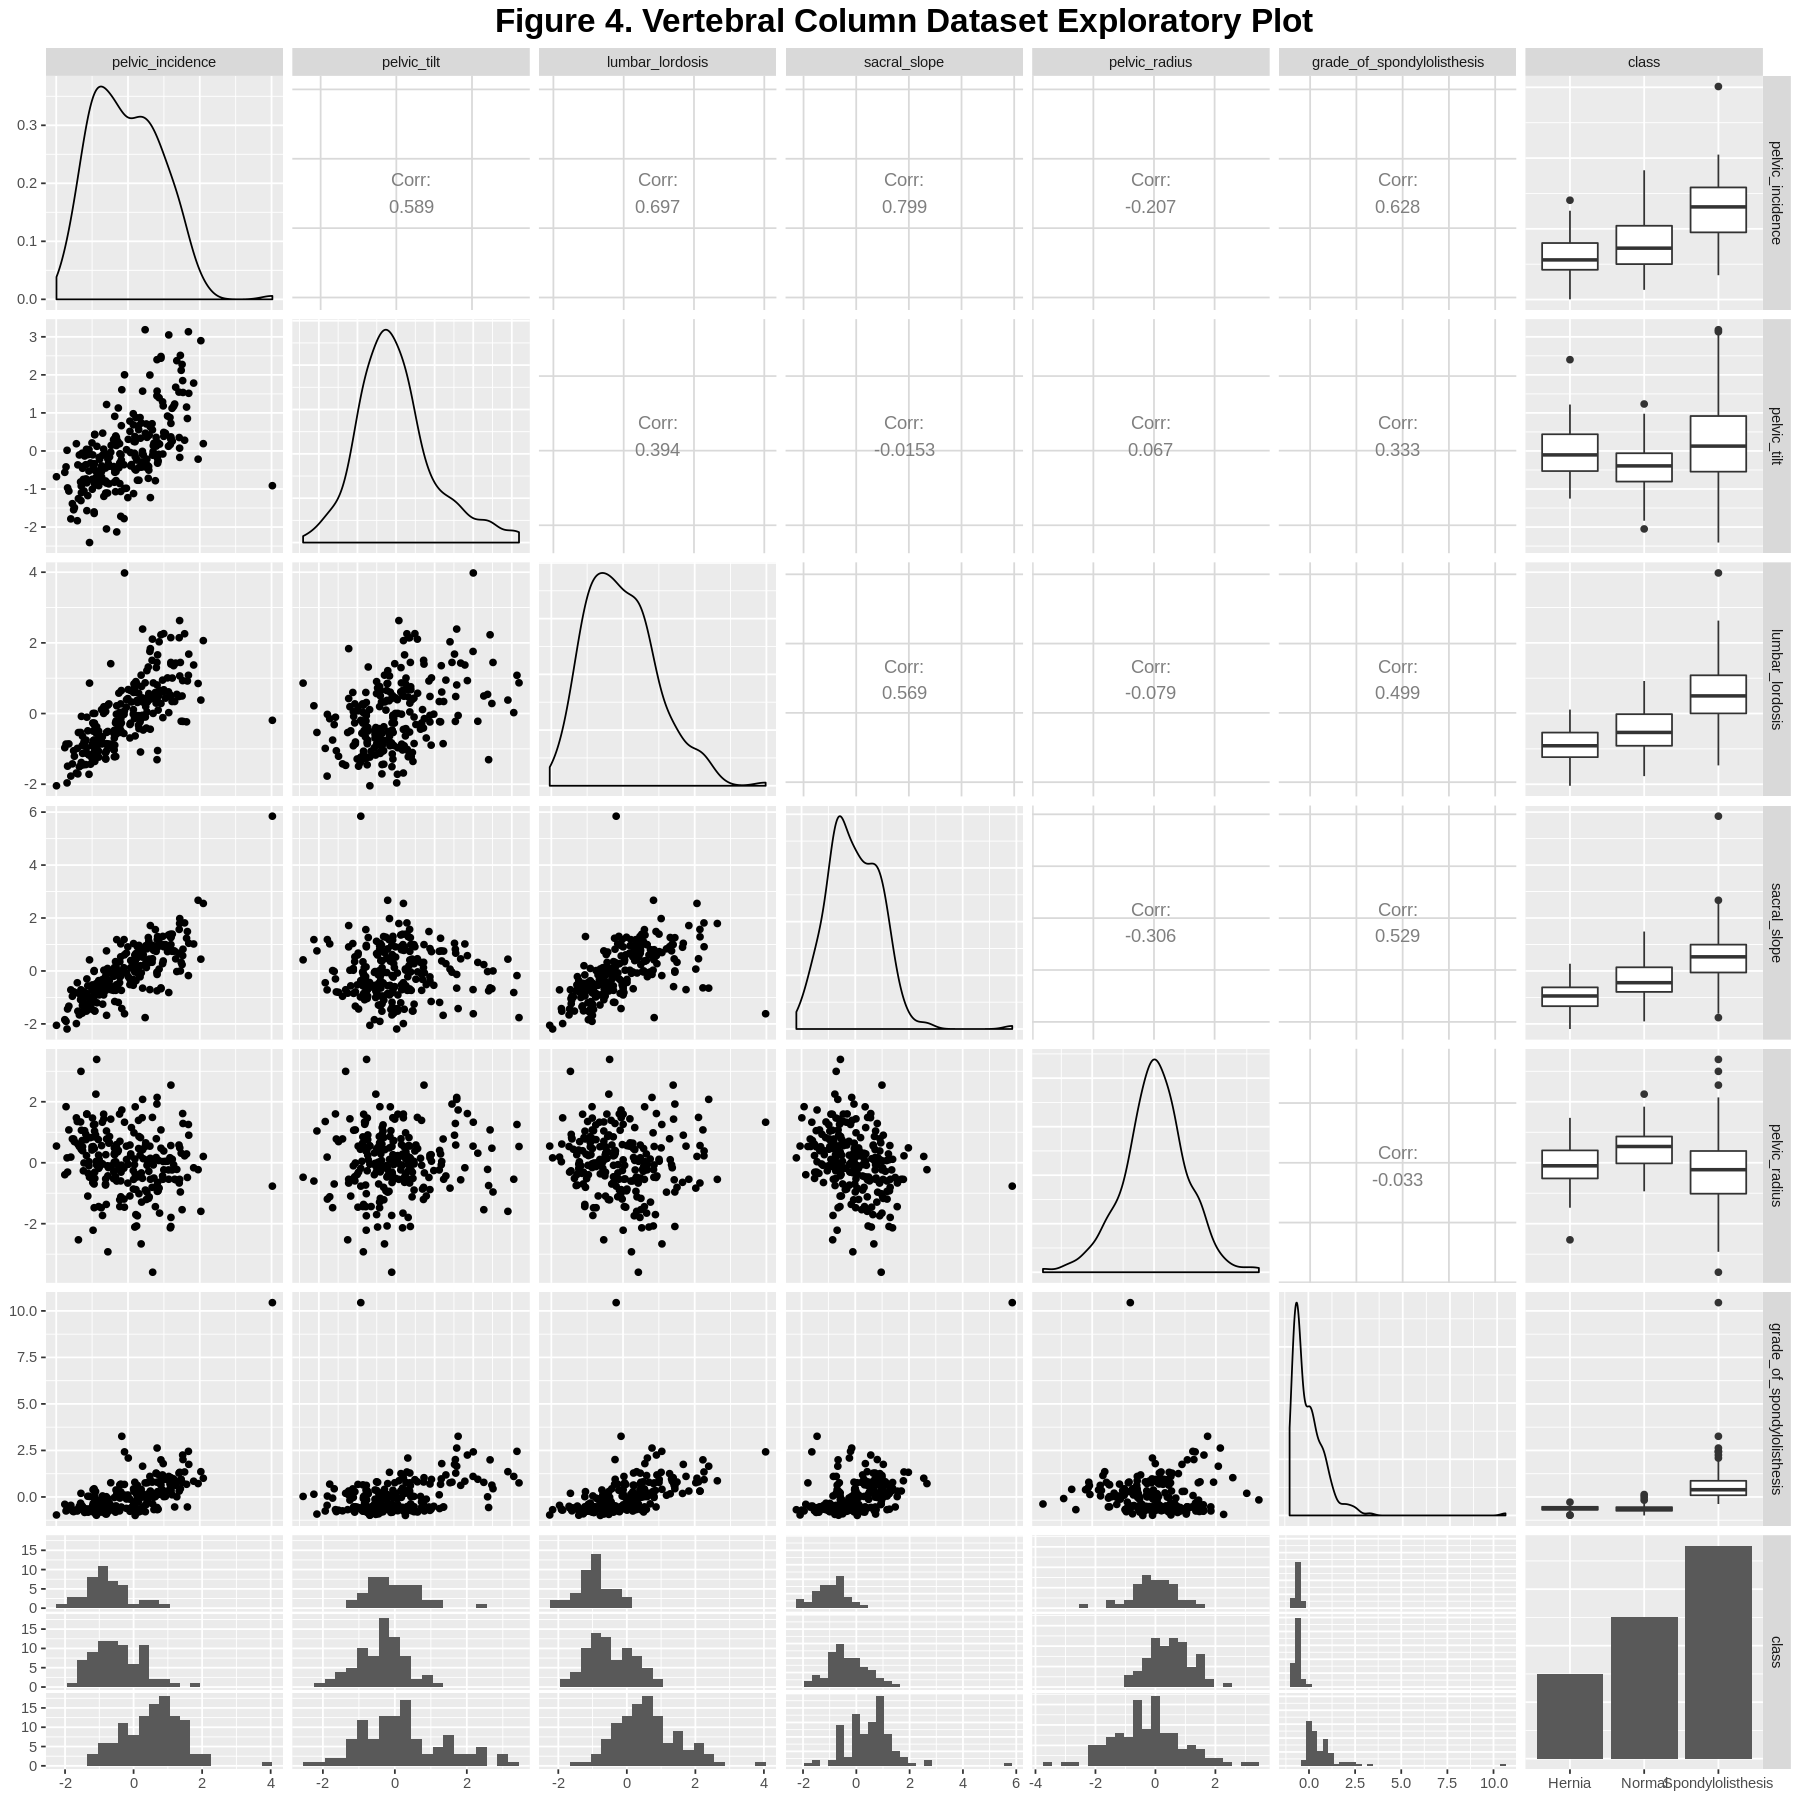

In [9]:
options(repr.plot.height = 15, repr.plot.width = 15)

ggpair_plot <- training_set %>%
  ggpairs(title = "Figure 4. Vertebral Column Dataset Exploratory Plot",
          lower = list(combo = wrap("facethist", binwidth = 0.3))) +
  theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold"))

ggpair_plot

On the diagonal, we can see that the distributions for the first five predictor variables are all relatively similar to a normal distribution (bell-shaped), whereas the distribution for Grade of Spondylolisthesis (GoS) is skewed sharply to the left. This oddity in the GoS variable can also be seen in the plots in the last row as well, where all the other predictor variables show a relatively wide histogram for all three classes, with small differences between their center values; but the GoS plots have weirdly sharp and narrow distributions, and very distinctly different center values.

Because of the "strange" characteristics of predictor grade_of_spondylolisthesis in the table above and in the ggpairs plot, we did some background research on it to understand the weirdness. We realized that the strangeness was because 'Grade of Spondylolisthesis' measures the *'degree of severity'* of someone's spondylolisthesis condition, commonly measured post-diagnosis. Hence, it's no wonder that *the severity of spondylolisthesis* would produce unnatural distribution plots and be highly skewed towards spondylolisthesis. Our project's purpose is to use *pre-diagnostic* measurements to construct a classification model for the goal of aiding physicians, so we decided to remove this variable.

##### Choosing K with Cross Validation:

We decided to use the k-nn algorithm to predict whether patients should be classified as disc herniation, spondylolisthesis or normal, and we found the best k-value through a 10-fold cross validation process.

During our cross validation process, despite setting the seed correctly, we still encountered a "weird" situation: we first tested k-values from 1 to 200 and found the best k-value to be 25. Since 25 is in the range of 0 to 50, we expected that if we tested k-values from 1 to 50 with cross validation again, k = 25 would still perform the best. However, this was not the case; the model with the highest accuracy was now when k = 48. We re-ran our cross validation code many times, each time changing k-value ranges and looking for the k-value with highest accuracy, but we could not get a consistent result for the best k-value.

We later realized that this was because there was a range of k values where model accuracies were very close to each other but fluctuated significantly each time the code was run; i.e. the slightest variation in data manipulation would result in a change to the best k-value. This was different from the worksheets in class where there was not as much 'noise' in the k vs accuracy plots and model-accuracies were different enough from one k-value to the next. This meant that (in the worksheets) even if the model-accuracies fluctuated when we repeated the cross-validation code cells, the best value for k would've still been the same.

After we discussed this with Trevor, we made a plan. Using a loop mechanism, we would run the cross-validation process 11 times, plotting the k-accuracy line-graph onto the same graph for each iteration, giving us a large picture of the overall accuracies of different k-values. Then, by looking at all 11 iterations, we would find the range of k-values with highest accuracies and chose a k-value from the middle of this range.

First, we do a 10-fold cross validation for the first time and generate a k-accuracy **base** plot. Later, all 10 other iterations will be added on top of this one.

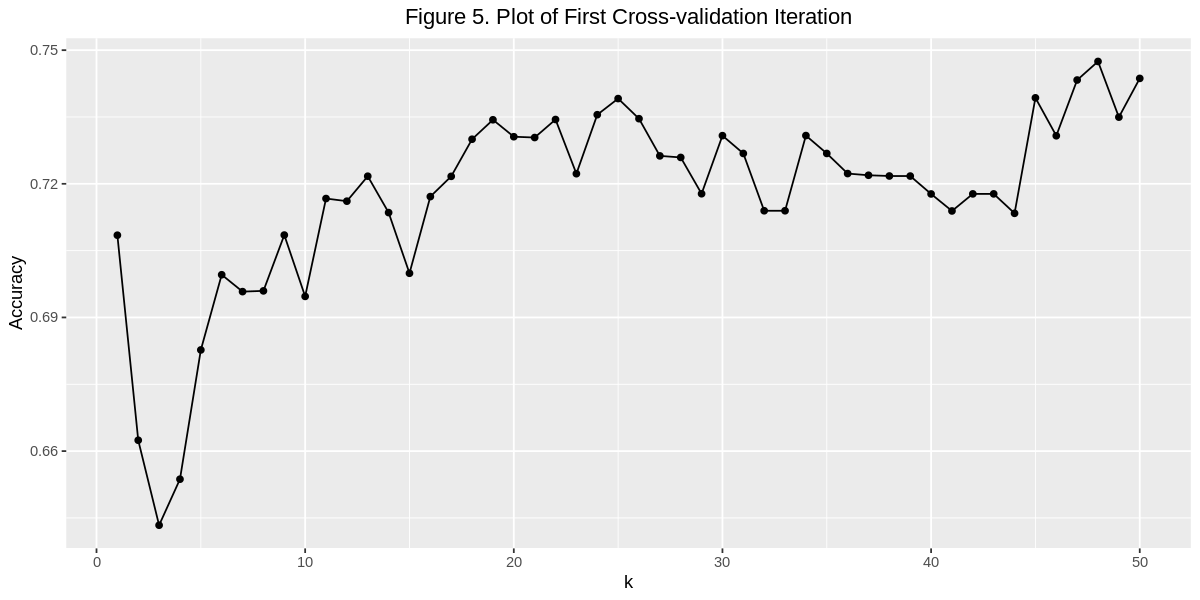

In [10]:
# Do cross validation for the first time
# generate a k-accuracy plot called "choose_k_plot"
k  <- data.frame(k=c(1:50))
train_control <- trainControl(method = "cv", number = 10)
choose_k <- train(x = X_training, y = Y_training, method = "knn", tuneGrid = k, trControl = train_control)
k_accuracies <- choose_k$results %>% select(k, Accuracy)

options(repr.plot.height=5, repr.plot.width=10)
choose_k_plot  <- ggplot(k_accuracies, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line() +
  ggtitle("Figure 5. Plot of First Cross-validation Iteration") +
  theme(plot.title = element_text(hjust = 0.5))
choose_k_plot

Now we could add the other 10 iterations onto this plot. To ensure the plot's effectiveness, we selected specific colours for each plot as well.

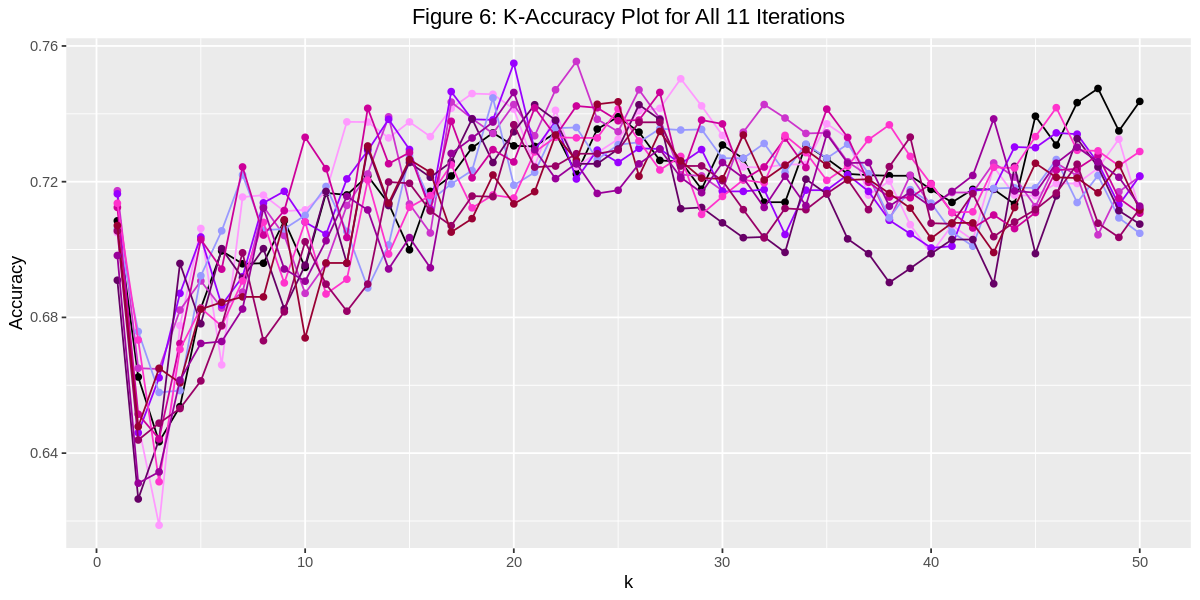

In [11]:
# All the line colours used in the final plot
colorList = c("#FF99FF", "#CC33CC", "#9900FF", "#9999FF", "#660066", "#CC0099", "#FF33CC", "#990066", "#990033", "#990099")

# Repeat cross validation for another 10 times
# Each time, generate a k accuracy plot and add this to the choose_k_plot created above
options(repr.plot.height=5, repr.plot.width=10)
for(i in 1:10) {
    k  <- data.frame(k=c(1:50))
    train_control <- trainControl(method = "cv", number = 10)
    choose_k <- train(x = X_training, y = Y_training, method = "knn", tuneGrid = k, trControl = train_control)
    k_accuracies <- choose_k$results %>% select(k, Accuracy)
    choose_k_plot  <- choose_k_plot +
        geom_point(data = k_accuracies, aes(x = k, y = Accuracy), colour = colorList[i]) +
        geom_line(data = k_accuracies, aes(x = k, y = Accuracy), colour = colorList[i])+
        ggtitle("Figure 6: K-Accuracy Plot for All 11 Iterations")
}
choose_k_plot

Based on **Figure 6**, we found that the optimal range for k (where the model accuracies seemed to be consistently high) was between 18 and 26. Finally, by choosing a value in the middle of this range, we concluded that k = 23.

##### Final Classfication Results

To evaluate our model's accuracy, we tested our model using the *testing data* which we set aside early on.

In [12]:
final_k = data.frame(k = 23)
final_classifier <- train(x = X_training, y = Y_training, method = "knn", tuneGrid = final_k)

test_pred <- predict(final_classifier, X_test)
test_results <- confusionMatrix(test_pred, Y_test)
test_results

Confusion Matrix and Statistics

                   Reference
Prediction          Hernia Normal Spondylolisthesis
  Hernia                 9      3                 0
  Normal                 6     20                 3
  Spondylolisthesis      0      2                34

Overall Statistics
                                          
               Accuracy : 0.8182          
                 95% CI : (0.7138, 0.8969)
    No Information Rate : 0.4805          
    P-Value [Acc > NIR] : 9.682e-10       
                                          
                  Kappa : 0.708           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Hernia Class: Normal Class: Spondylolisthesis
Sensitivity                 0.6000        0.8000                   0.9189
Specificity                 0.9516        0.8269                   0.9500
Pos Pred Value              0.7500        0.6897                   0.9444
Neg 

As shown in the *'Overall Statistics'* section, we can see that our model has an accuracy of 0.818, or about 82%. This tells us that given a new data set of new patients with these 5 lower-spine measurements, our model would predict the diagnosis correctly for about 82% of the patients in the dataset.

##### Visualizing Classification Results

With 5 predictor variables in our classfication model, it is hard to generate a simple and effective plot and visualize our classification results directly. Therefore, we decided to choose a few pairs of predictor variables and make scatter plots coloured by class. (If we tried to show all the possible pairs of variables, there would be $\binom{5}{2} = 10$ plots total. Due to limited space, we chose to show 3 plots with each predictor variable appearing at least once.)

We generated two kinds of scatter plots: on each row, the plot on the left were coloured by their *actual* classes while the one on the right were coloured by the *predicted* classes. In this way, we can compare the predicted classes for the testing dataset with their real classes. Specifically, **Figure 7**, **Figure 9**, **Figure 11** are coloured by the actual classes, and **Figure 8**, **Figure 10** and **Figure 12** are coloured by the predicted classes.

If we only wanted to visualize the predicted class for each point, we can look at **Figures 8, 10, and 12** directly. But side-by-side plots that are completely identical to one another besides the colouring of the data points can be very helpful, since it helps highlight (one aspect of) the model's accuracy. However, it needs to be recognized that this is still an incomplete approach in many ways due to the limited dimensions plotted.

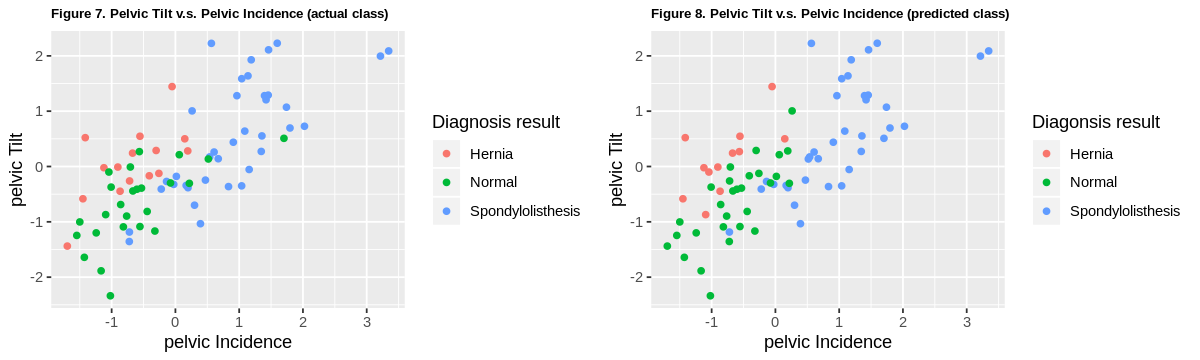

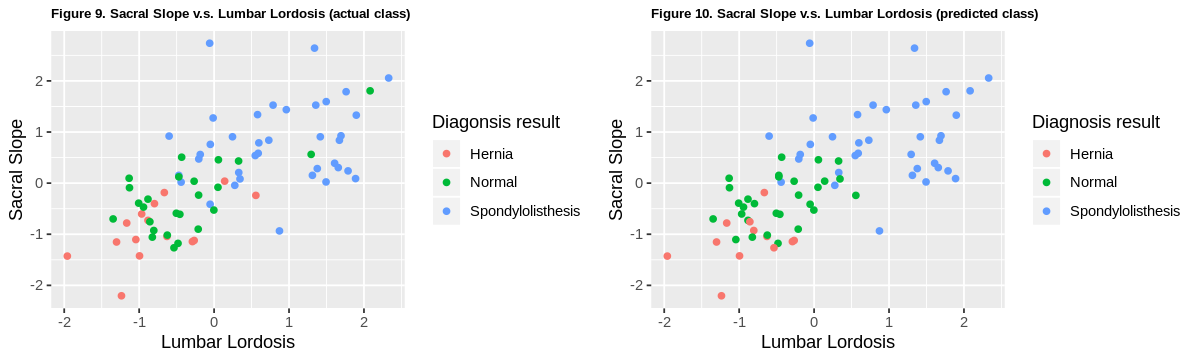

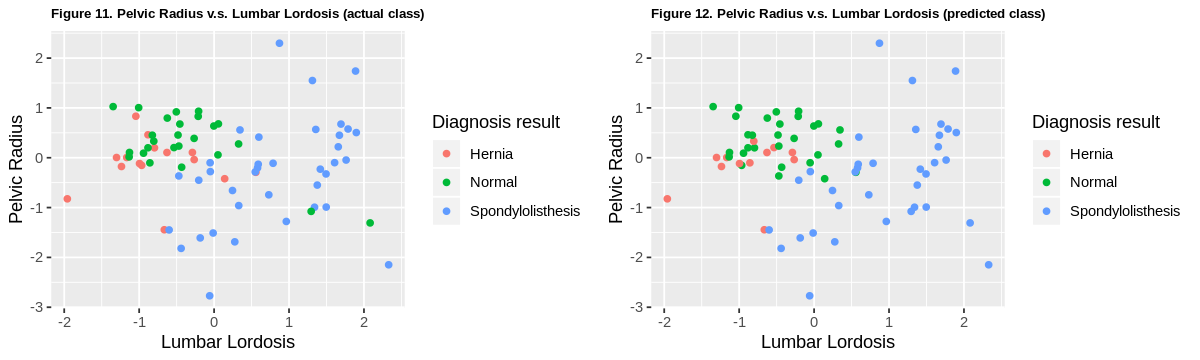

In [13]:
# Make predictions using our classification model on the testing data
actual  <- testing_set
predicion <- data.frame(X_test,test_pred)

#Plot out the first two plots and arrange them side-by-side
options(repr.plot.height=3, repr.plot.width=10)
actual_plot_1  <- actual %>%
    ggplot(aes(x = pelvic_incidence,
               y = pelvic_tilt,
               colour = class)) +
        geom_point() +
        labs(x = "pelvic Incidence",
             y = "pelvic Tilt",
            colour = 'Diagnosis result') +
        ggtitle("Figure 7. Pelvic Tilt v.s. Pelvic Incidence (actual class)") +
        theme(plot.title = element_text(size = 8, face = "bold"))

predicted_plot_1  <- predicion %>%
    ggplot(aes(x = pelvic_incidence, 
               y = pelvic_tilt, 
               colour = test_pred)) +
        geom_point() +
        labs(x = "pelvic Incidence",
             y = "pelvic Tilt",
            colour = 'Diagonsis result') +
        ggtitle("Figure 8. Pelvic Tilt v.s. Pelvic Incidence (predicted class)") +
        theme(plot.title = element_text(size = 8, face = "bold"))

grid.arrange(actual_plot_1, predicted_plot_1, ncol=2)


#Plotting the middle two plots and arranging them side-by-side
actual_plot_2  <- actual %>%
    ggplot(aes(x = lumbar_lordosis,
               y = sacral_slope,
               colour = class)) +
        geom_point() +
        labs(x = "Lumbar Lordosis",
             y = "Sacral Slope",
            colour = 'Diagonsis result') +
        ggtitle("Figure 9. Sacral Slope v.s. Lumbar Lordosis (actual class)") +
        theme(plot.title = element_text(size = 8, face = "bold"))

predicted_plot_2  <- predicion %>%
    ggplot(aes(x = lumbar_lordosis, 
               y = sacral_slope, 
               colour = test_pred)) +
        geom_point() +
        labs(x = "Lumbar Lordosis",
             y = "Sacral Slope",
            colour = 'Diagnosis result') +
        ggtitle("Figure 10. Sacral Slope v.s. Lumbar Lordosis (predicted class)") +
        theme(plot.title = element_text(size = 8, face = "bold"))

grid.arrange(actual_plot_2, predicted_plot_2, ncol=2)


#Plotting the last row of plots and arranging them side-by-side
actual_plot_3 <- actual %>%
    ggplot(aes(x = lumbar_lordosis,
               y = pelvic_radius,
               colour = class)) +
        geom_point() +
        labs(x = "Lumbar Lordosis",
             y = "Pelvic Radius",
            colour = 'Diagnosis result') +
        ggtitle("Figure 11. Pelvic Radius v.s. Lumbar Lordosis (actual class)") +
        theme(plot.title = element_text(size = 8, face = "bold"))

predicted_plot_3  <- predicion %>%
    ggplot(aes(x = lumbar_lordosis,
               y = pelvic_radius,
               colour = test_pred)) +
        geom_point() +
        labs(x = "Lumbar Lordosis",
             y = "Pelvic Radius",
            colour = 'Diagnosis result') +
        ggtitle("Figure 12. Pelvic Radius v.s. Lumbar Lordosis (predicted class)") +
        theme(plot.title = element_text(size = 8, face = "bold"))

grid.arrange(actual_plot_3, predicted_plot_3, ncol=2)



Looking at some of the plots, we can see relatively mixed results. Overall, the classification model seems to do quite a good job in classifying the data into 3 separate classes, as most of the data points were coloured correctly. However, there were also a few points in each plot that the model did not predict correctly, and those were often in the middle of a cluster of other coloured data points (e.g **Figure 11 & 12**: there are two small green data points in the middle of the large group of blue ones that were mis-classified).

Ultimately, it is important to remember that these are 2-variable interpretations of a 5-variable classification model, which means that individual plots like these can barely capture the whole picture. There are merely 2-dimensional 'cuts' of the model, and should not hold too much weight in the overall evaluation of the classification accuracy.

### Discussion

##### Findings and Expectations:

With 75% of our dataset, we trained a K-Nearest-Neigbours classifier using k = 23, and it can predict the diagnosis of a new patient with accuracy of 82%. Our group expected a classifier with a lower accuracy, around the 78% accuracy range. We hypothesized this because prior researchers have found accuracies of 78.7% (Unal et. al, 2016) (2) and 78.3% (Akben, 2016) (5) when using K-NN methods on the same UCI Vertebral Column dataset. It is important to note that those aforementioned researchers used the complete dataset and did *not* remove the GoS variable as we did. This surprised us because the GoS variable seemed to be a 'cheat' variable, one that would've been extremely effective in classification due to its post-diagnostic nature and narrow variations. However, it is plausible that including the GoS variable may have negatively influenced the researchers' classification models, as each variable's contribution to the model is not a simple addition, instead it operates through much more complex interactions.

For this project, we aimed to produce a classification model that can use physical measurements of a patient's spines to make preliminary diagnoses. Currently, the predominant methods of diagnosing spinal abnormalities are quite subjective and can be dependent upon the physician's experience and skills. This can be problematic since, as mentioned before, spondylolisthesis and herniasted discs have very similar general symptoms. Further, it's estimated that about 11.5% of the population has spondylolisthesis, but very few actually experience symptoms (3). Therefore, inexperienced physicians or poor reporting of symptoms can significantly impair diagnosis. With the support of data driven tools like ours, physicians can get a 'third voice' on their jobs.

##### Impact of Our Findings:

An effective model would have many significant impacts. First, it could increase the objectivity and accuracy of spinal abnormality diagnoses. Pain perception and symptom experience are highly variable between individuals, which significantly increases the difficulty of diagnosing spinal abnormalities like these. Ineffective diagnosis is costly for patients, insurers, and care providers and also may threaten patients' health. A solid classification model can then be used by both experienced and less experienced physicians to augment their clincial diagnoses, ultimately improvely the well-being of both patients and physicians. To this end, many prior researchers have built classification models using this dataset from the UCI Machine Learning Deposit, and found promising results. Specifically, Akban (2016) experimented with multiple classification strategies - including K-NN - and found that the Naive Bayes Classification in Python produced the highest overall accuracy (4), hinting at that method's potential utility. Another researcher who used neural networks concluded that they are 'effective and efficient expert systems' for diagnosing spondylolisthesis and hernias (Oyedotun et al. 2016) (5), reinforcing the importance of data-driven methods in the clinical setting.

##### Future Questions
Given the accuracy of 82%, we expect to improve our accuracy by considering these following questions in the future:
1. What variables and/or combination of variables should be included in the model to produce the highest accuracy?
2. How can the model learn from its own failed predictions evolve over time?
3. What role could the 'Grade of Spondylolisthesis' variable (which we removed from our analysis) play in improving/worsening our model?
4. Digging deeper into the confusion matrix and looking at the *'Statistics by Class'* section, there were some very interesting differences across the classes. For example, the Spondylolisthesis class had a significantly higher *Balanced Accuracy* than both the Hernia and Normal classes - 93% compared to 78% and 81% respectively. In fact, the spondylolisthesis class had significantly larger values for almost all categories of statistics. We believe this was due to the fact that there were **more** data points in the spondylolisthesis class, thus providing the *train()* function with more information to build a model upon. Although we do not believe it was necessary to upsample our original dataset, we wonder if doing so would've changed these *Class Statistics*, potentially improving the model's overall accuracy. 


### References

(1) Mitz, Eric. “‘Slipped Disc’ vs ‘Slipped Vertebrae.’” Integrated Physical Medicine, Integrated Physical Medicine, 4 Aug. 2017, https://www.integratedpainandrehab.com/blog/slipped-disc-vs-slipped-vertebrae/.

(2) Unal, Yavuz, et al. “Classification of Vertebral Column Disorders and Lumbar Discs Disease Using Attribute Weighting Algorithm with Mean Shift Clustering.” Measurement, vol. 77, 2016, pp. 278–291., doi:10.1016/j.measurement.2015.09.013.

(3) Kalichman, L. et l. (2009). Spondylolysis and spondylolisthesis: prevalence and association with low back pain in the adult community-based population. Spine, 34(2), 199–205. doi:10.1097/BRS.0b013e31818edcfd

(4) What Does Your Spondylolisthesis Diagnosis Mean? – Penn Medicine. (2017, December 12). Retrieved November 25, 2019, from https://www.pennmedicine.org/updates/blogs/neuroscience-blog/2017/december/spondylolisthesis.

(5) Akben, S. B. (2016). Importance of the shape and orientation of the spine and pelvis for the vertebral column pathologies diagnosis with using machine learning methods. Biomedical Research 2016: Special Issue, S337–S342. Retrieved from https://www.alliedacademies.org/articles/importance-of-the-shape-and-orientation-of-the-spine-and-pelvis-for-the-vertebral-column-pathologies-diagnosis-with-using-machine-.html

(6) Oyedotun, O. K., Olaniyi, E. O., & Khashman, A. (2016). Disk hernia and spondylolisthesis diagnosis using biomechanical features and neural network. Technology and Health Care, 24(2), 267–279. doi: 10.3233/thc-151126
